In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

# IMPORTATION DES DONNEES

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive', force_remount=True)  
os.chdir('/content/gdrive/My Drive/EDSC2')
os.listdir()

Mounted at /content/gdrive


['data', 'models', 'sample_submission.csv', 'Tutoriel.ipynb']

In [ ]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

# EXPLORATION ET ANALYSE DES DONNEES

In [ ]:
#Dimension de chaque base
print(train.shape)
print(test.shape)

(2243649, 15)
(137349, 14)


In [ ]:
#Type de chaque colonne
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243649 entries, 0 to 2243648
Data columns (total 15 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   date_evaluation            object 
 1   estimation_prix            float64
 2   adresse_code_voie          int64  
 3   code_postal                int64  
 4   nom_commune                int64  
 5   code_commune               int64  
 6   type_local                 int64  
 7   surface_reelle_bati        float64
 8   surface_terrain            float64
 9   nombre_pieces_principales  float64
 10  longitude                  float64
 11  latitude                   float64
 12  departement                int64  
 13  year                       int64  
 14  id                         int64  
dtypes: float64(6), int64(8), object(1)
memory usage: 256.8+ MB


Maison         1662501
Appartement     581148
Name: type_local, dtype: int64


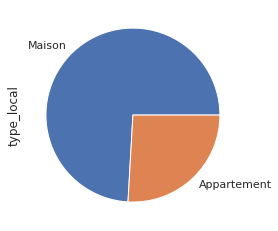

In [ ]:
print(train['type_local'].value_counts())
train['type_local'].value_counts().plot.pie();

In [ ]:
#Aperçu de la base
train.head()

,date_evaluation,estimation_prix,adresse_code_voie,code_postal,nom_commune,code_commune,type_local,surface_reelle_bati,surface_terrain,nombre_pieces_principales,longitude,latitude,departement,year,id
0,2014-01-09,251500.0,8671,1699,5181,5527,Maison,147.0,1501.0,5.0,69.771710,50.195540,16,2014,0
1,2017-06-12,325000.0,5080,1699,5181,5527,Maison,132.0,896.0,4.0,69.784632,50.178470,16,2017,1
2,2018-04-13,236850.0,8671,1699,5181,5527,Maison,108.0,1358.0,4.0,69.761486,50.184971,16,2018,2
3,2018-04-23,186000.0,8247,1699,5181,5527,Maison,123.0,785.0,5.0,69.788317,50.191543,16,2018,3
4,2014-01-11,370000.0,8265,2084,5752,6124,Maison,220.0,880.0,8.0,71.092670,49.106485,16,2014,4


In [ ]:
#Statistiques descriptives 
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
estimation_prix,2243649.0,1.800156e+05,96311.308451,42000.0,107000.000000,1.600000e+05,2.340000e+05,490000.0
adresse_code_voie,2243649.0,7.345659e+03,2097.311728,0.0,6239.000000,7.742000e+03,8.712000e+03,14270.0
code_postal,2243649.0,2.344324e+03,1443.547821,0.0,1088.000000,2.208000e+03,3.451000e+03,5730.0
nom_commune,2243649.0,9.835746e+03,7334.229206,0.0,3299.000000,8.219000e+03,1.512000e+04,29522.0
code_commune,2243649.0,1.046876e+04,7823.436263,0.0,3497.000000,8.731000e+03,1.605900e+04,31511.0
surface_reelle_bati,2243649.0,8.551794e+01,39.869851,1.0,60.000000,8.300000e+01,1.060000e+02,1311.0
surface_terrain,2243649.0,4.764614e+02,1108.848421,1.0,77.000000,3.210000e+02,6.180000e+02,382680.0
nombre_pieces_principales,2243649.0,3.740016e+00,1.534184,1.0,3.000000,4.000000e+00,5.000000e+00,112.0
longitude,2243649.0,4.948537e+01,18.174368,0.0,36.010683,5.091402e+01,6.237206e+01,100.0
latitude,2243649.0,5.696782e+01,24.244535,0.0,35.659056,6.121317e+01,7.710723e+01,100.0


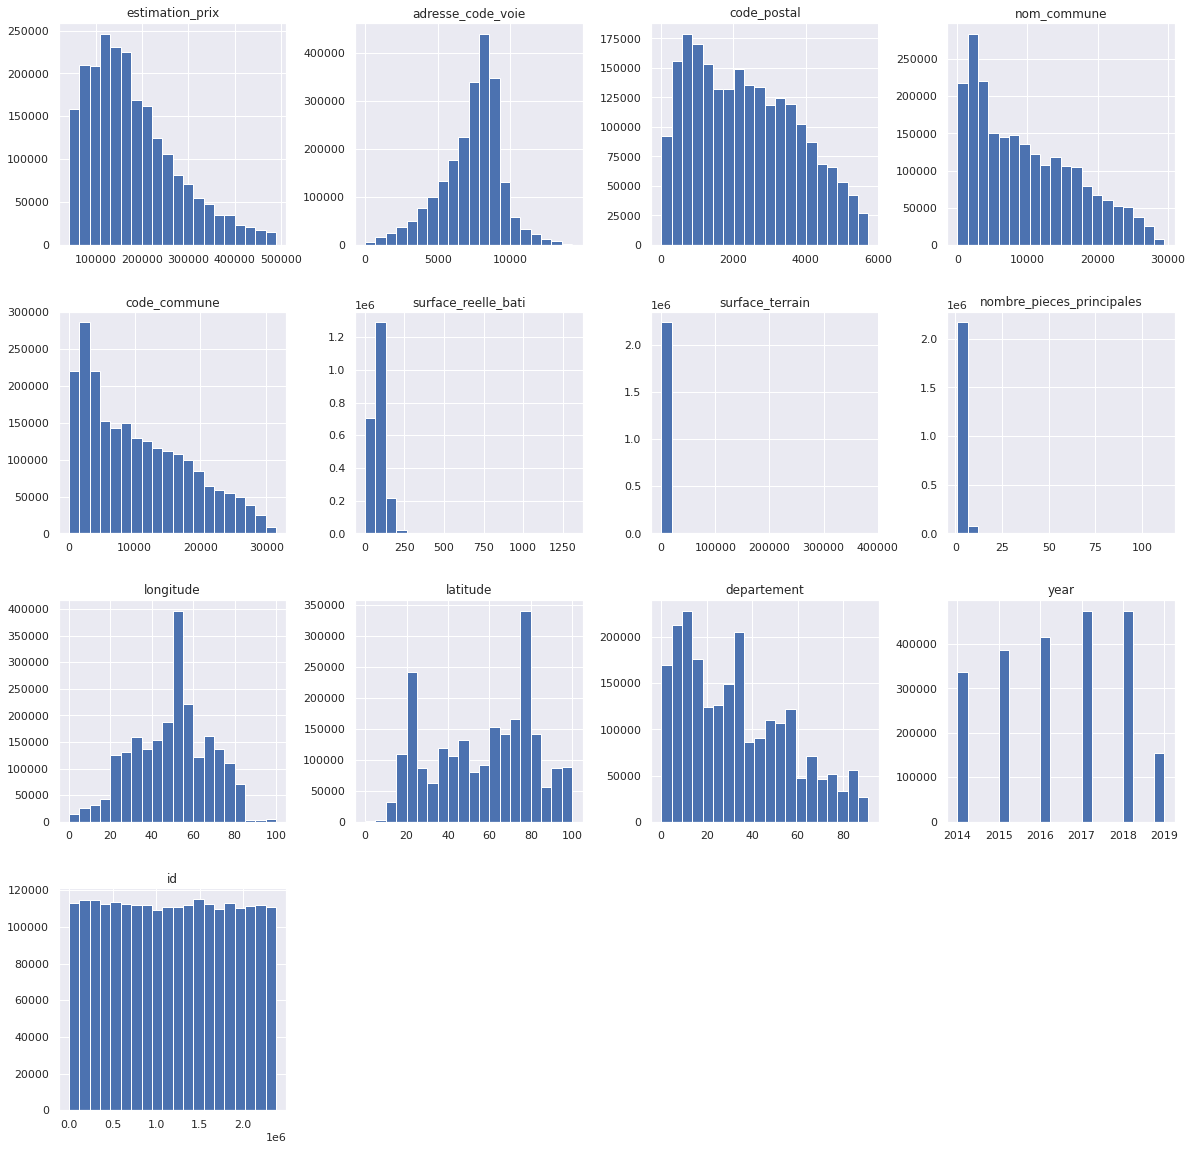

In [ ]:
#histogramme des variables quantitatives
train.hist(figsize=(20, 20), bins=20);

In [ ]:
train.corr()

,estimation_prix,adresse_code_voie,code_postal,nom_commune,code_commune,surface_reelle_bati,surface_terrain,nombre_pieces_principales,longitude,latitude,departement,year,id
estimation_prix,1.000000,-0.216774,-0.517593,-0.512368,-0.516370,0.375785,0.069502,0.316214,0.052950,-0.018218,-0.385822,0.039768,0.117914
adresse_code_voie,-0.216774,1.000000,0.254788,0.235230,0.236713,0.068531,0.088772,0.034135,-0.001429,-0.041225,0.200370,-0.005548,-0.085871
code_postal,-0.517593,0.254788,1.000000,0.943989,0.951264,0.120069,0.115226,0.096218,-0.086546,0.063960,0.735826,-0.000737,-0.148541
nom_commune,-0.512368,0.235230,0.943989,1.000000,0.989553,0.098598,0.097515,0.084361,-0.075545,0.070727,0.699926,-0.001738,-0.134346
code_commune,-0.516370,0.236713,0.951264,0.989553,1.000000,0.098177,0.098979,0.083658,-0.076859,0.070924,0.705296,-0.001933,-0.132633
surface_reelle_bati,0.375785,0.068531,0.120069,0.098598,0.098177,1.000000,0.214737,0.788284,-0.095367,0.054674,0.193414,0.009056,-0.014060
surface_terrain,0.069502,0.088772,0.115226,0.097515,0.098979,0.214737,1.000000,0.161890,-0.062527,0.001183,0.122580,0.001100,0.020511
nombre_pieces_principales,0.316214,0.034135,0.096218,0.084361,0.083658,0.788284,0.161890,1.000000,-0.106698,0.123155,0.176197,0.005048,-0.008170
longitude,0.052950,-0.001429,-0.086546,-0.075545,-0.076859,-0.095367,-0.062527,-0.106698,1.000000,-0.226998,-0.114453,-0.020671,-0.005162
latitude,-0.018218,-0.041225,0.063960,0.070727,0.070924,0.054674,0.001183,0.123155,-0.226998,1.000000,0.115796,0.005114,0.305909


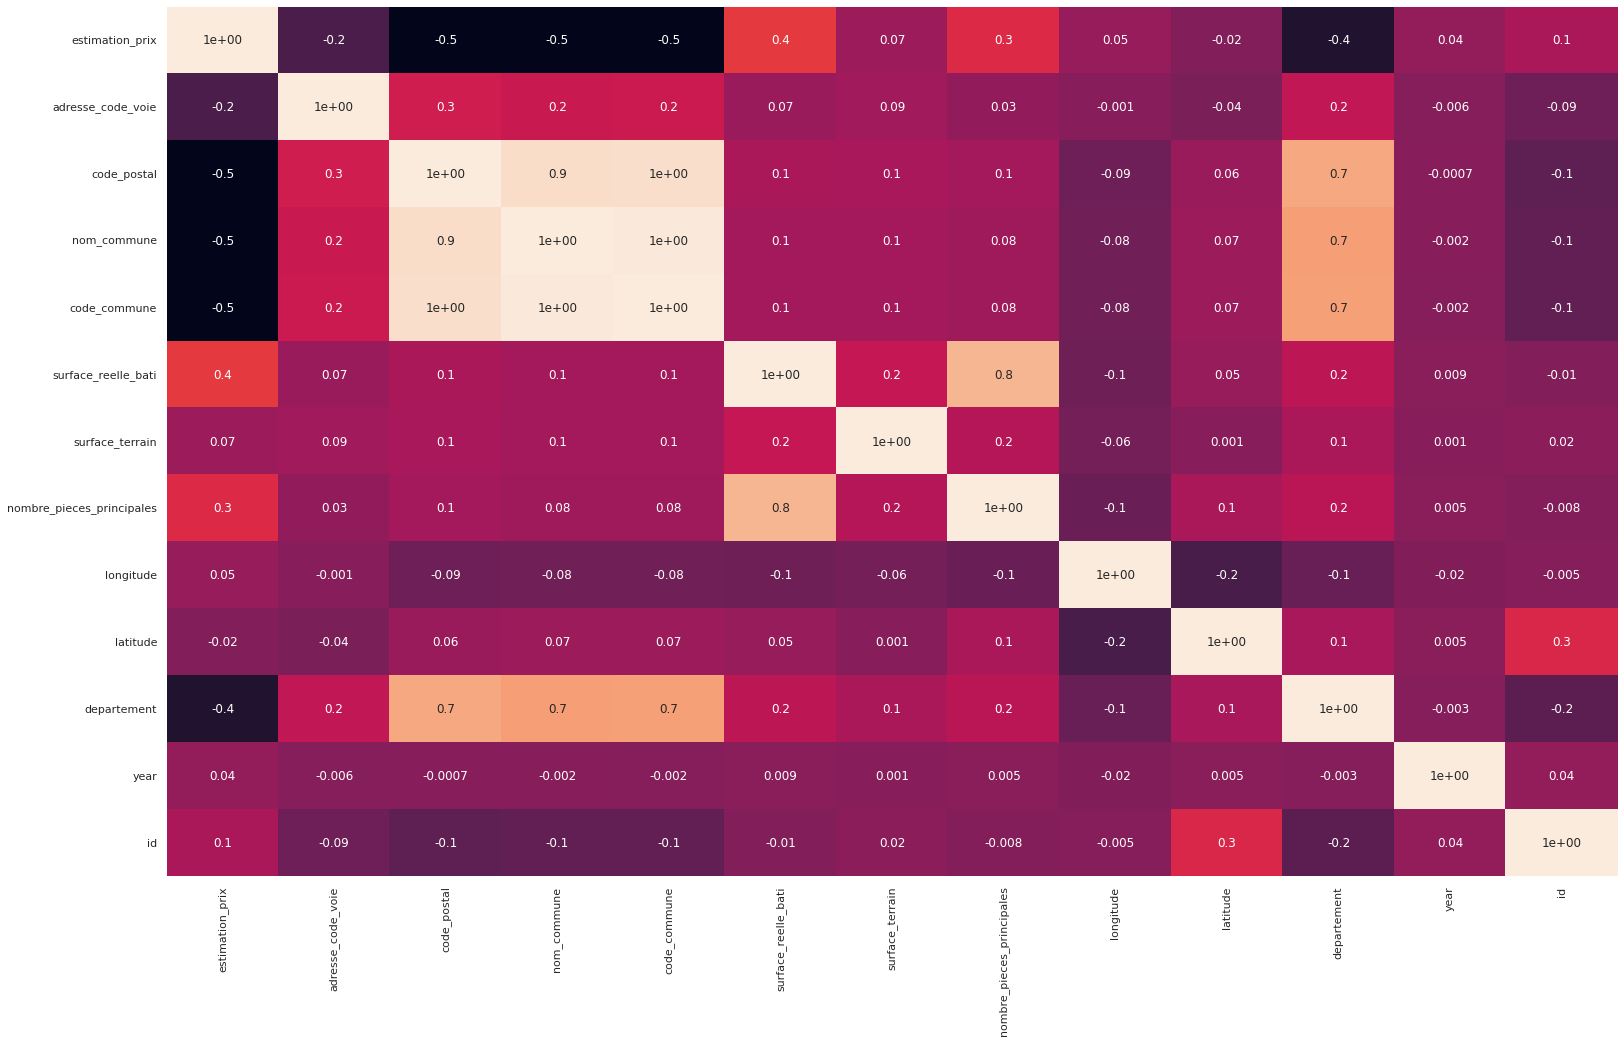

In [ ]:
#correlation entre les features
import matplotlib.pyplot as plt
plt.figure(figsize=(26, 16))
sns.heatmap(train.corr(), cmap='rocket', annot=True, fmt=f'0.1', cbar=False);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


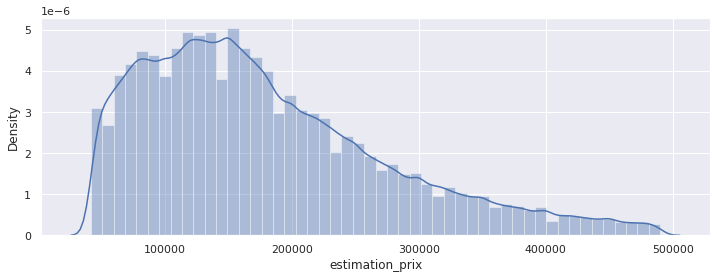

In [ ]:
#Distribution de la variable cible
plt.figure(figsize=(12, 4))
sns.distplot(train['estimation_prix']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


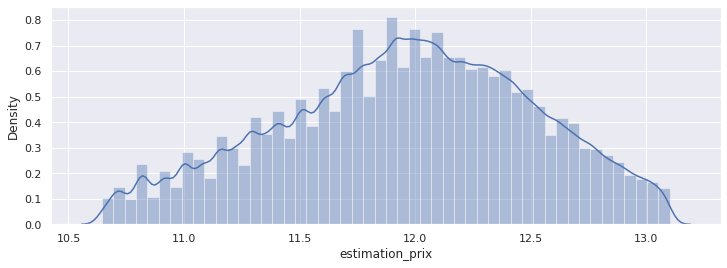

In [ ]:
#le logarithm de la variable estimation-prix est plus adapté duû à la distribution normale
#Nous l'utiliserons comme variable cible
plt.figure(figsize=(12, 4))
sns.distplot(np.log(train['estimation_prix']));

In [ ]:
# Ajouter le logarithm des prix à la base
train['logprix'] = np.log(train['estimation_prix'])

# Suppression de la variable estimation_prix 
train= train.drop('estimation_prix', axis=1)


In [ ]:
#Corrélation de la variable cible avec les autres features
train.corr()['logprix'].sort_values(ascending=False)

logprix                      1.000000
surface_reelle_bati          0.385273
nombre_pieces_principales    0.343439
id                           0.113350
surface_terrain              0.075503
longitude                    0.038638
year                         0.034958
latitude                    -0.006616
adresse_code_voie           -0.216718
departement                 -0.379484
code_postal                 -0.521334
nom_commune                 -0.525539
code_commune                -0.530309
Name: logprix, dtype: float64

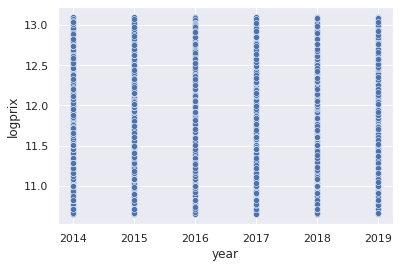

In [ ]:
sns.scatterplot(x='year', y='logprix', data=train);

# NETTOYAGE DES DONNEES

In [ ]:
#Recherche de valeurs maquantes:
pd.DataFrame({'Nombre': train.isna().sum(),
              'Pourcentage': (train.isna().sum() / len(train)) *100}).sort_values(by='Pourcentage', ascending=False)

,Nombre,Pourcentage
date_evaluation,0,0.0
estimation_prix,0,0.0
adresse_code_voie,0,0.0
code_postal,0,0.0
nom_commune,0,0.0
code_commune,0,0.0
type_local,0,0.0
surface_reelle_bati,0,0.0
surface_terrain,0,0.0
nombre_pieces_principales,0,0.0


In [ ]:
#Codification de la variable cible 
train['type_local'] = train['type_local'].map({'Maison':1, 'Appartement':0})
test['type_local'] = test['type_local'].map({'Maison':1, 'Appartement':0})